# Data Analysis of Covid-19 in the Philippines for the Year 2022

In this data analysis project, we will be examining the impact of COVID-19 in the Philippines in the year 2022. Using a data from https://ourworldindata.org/coronavirus/country/philippines#citation, we will investigate how the virus has affected various aspects of life in the country. The goal of this project is to provide a comprehensive understanding of the impact of COVID-19 in the Philippines and to inform policy decisions for addressing the ongoing pandemic. 

<b> Author: </b> Christian P. Ortiz

<b><u> Note: This project is also part of the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and also a way for the author to showcase the knowledge he gained from the course. </b></u>

## Importing the required libraries that will be use in this analysis.

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

## Downloading the Dataset

In order to analyze and use the data, we will import the dataset we downloaded from https://ourworldindata.org/ into our notebook in this section. 

Let's begin by importing the data.

In [9]:
covid_df = pd.read_csv('covid-ph.csv')

Let us save and upload our work to Jovian before continuing.

In [10]:
project_name = "Covid-19 Report in the Philippines in year 2022"

In [11]:
!pip install jovian --upgrade -q

In [12]:
import jovian

In [39]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chris-ortiz/covid-19-report-in-the-philippines-in-year-2022" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022


'https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022'

## Data Preparation and Cleaning

In this section, we will clean the data we imported and prepare it for analyzing. First, let us convert the "date" column from object to datetime to inform python that this particular column contains date.

In [16]:
covid_df['date'] = pd.to_datetime(covid_df.date)

Next is, seperating the date into 4 columns to have a wider access to data.

In [17]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

## Filtering data

First, we will filter the data base on location as we only want to focus on the country Philippines.

In [18]:
ph_df = covid_df.loc[(covid_df['location'] == 'Philippines')]

Next is fltering the data base on year as we only want the data from year 2022.

In [19]:
ph_df = ph_df.loc[(ph_df['year'] == 2022)]

In [20]:
ph_df.dropna(axis=1, how='all', inplace=True)

Now, from 250,000 rows and 71 columns, we are down to 365 rows only and 62 columns. This is possible by filtering the data and dropping rows with missing values. We are now ready to analyze and visualize the data.

In [21]:
import jovian

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chris-ortiz/covid-19-report-in-the-philippines-in-year-2022" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022


'https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022'

## Exploratory Analysis and Visualization

In this section, we will start to analyze and visualize the data to get meaningful insights from it.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## First, let us see the trend of Covid-19 for the whole year of 2022

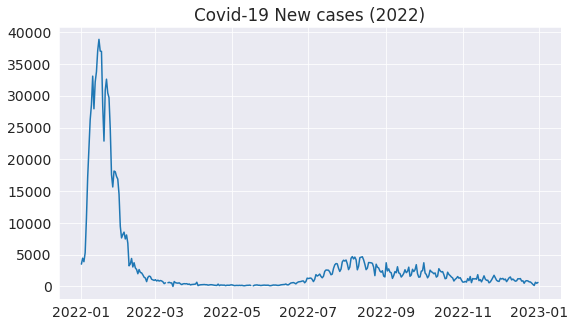

In [24]:
label = ph_df['date']
value= ph_df['new_cases']
plt.plot(label, value)
plt.title('Covid-19 New cases (2022)');

We can see that new cases reaches its peak around January to February and slowly fall down and flat around March to May.

## Now, let us compare it to the new deaths and plot it in the same graph.

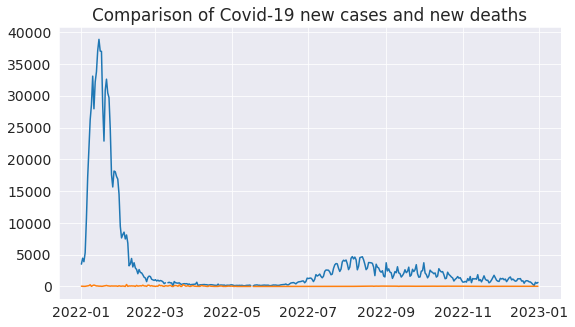

In [25]:
label = ph_df['date']
new_cases = ph_df['new_cases']
new_deaths = ph_df['new_deaths']
plt.plot(label, new_cases)
plt.plot(label, new_deaths)
plt.title('Comparison of Covid-19 new cases and new deaths');

In this graph, we can see that the new cases doesn't affect new deaths a lot as it stays flat even though new cases climb to its peak.

## Now, let us look at the total cases per month in a more detailed way using bar graph.

In [26]:
per_month = ph_df.groupby(['month']).sum()

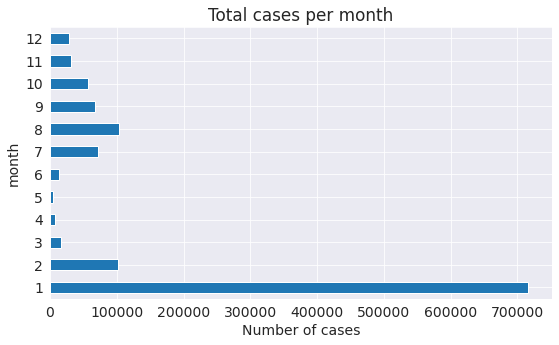

In [27]:
per_month.new_cases.plot(kind='barh')
plt.xlabel('Number of cases')
plt.title('Total cases per month');

Now, we can see in more detailed way that the month of January has the highest recorded cases around 700,000. From it's peak, it goes down to 100,000 in between just a month. 

## Next is the total death per month

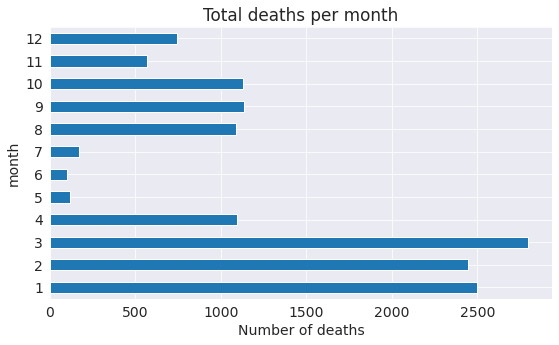

In [28]:
per_month.new_deaths.plot(kind='barh')
plt.xlabel('Number of deaths')
plt.title('Total deaths per month');

Now, we can see that even though the month of January have the highest reported cases, it is the month of March which have the highest reported deaths.

## Lastly is the total cases per day.

In [29]:
per_day = ph_df.groupby(['weekday']).sum()

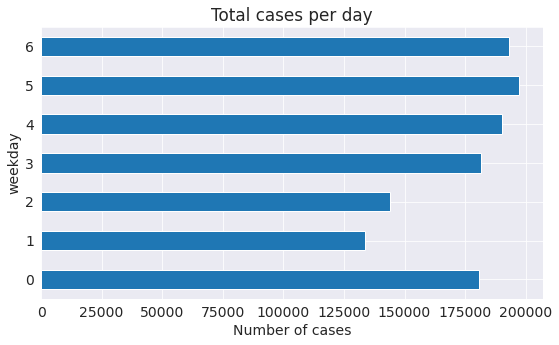

In [30]:
per_day.new_cases.plot(kind='barh')
plt.xlabel('Number of cases')
plt.title('Total cases per day');

For this graph, we can see that Saturday have the highest total reported cases and lowest during Tuesdays.

Let us save and upload our work to Jovian before continuing

In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chris-ortiz/covid-19-report-in-the-philippines-in-year-2022" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022


'https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022'

## Asking and Answering Questions

For this part of our analysis, we will ask and answer question base on our analysis to find meaningful insights from it.

#### Q1: What is the ratio of new cases to new deaths for the year 2022?

In [67]:
whole_year = ph_df.groupby(['year']).sum()
whole_year

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,month,day,weekday
year,,,,,,,,,,,,,,,,,,,,,
2022,1.371966e+09,1221098.0,1222819.143,22026506.0,13887.0,14037.152,1.187243e+07,10566.871,10581.771,190608.314,...,25998.95,262.07,4.217904e+10,1447852.5,100.21,11.48,12529.118457,2382,5738,1097


In [68]:
year_ratio = whole_year.new_deaths / whole_year.new_cases
year_ratio

year
2022    0.011373
dtype: float64

So dividing the total new deaths and total new cases resulted to 0.0113 or 1.13%. This means that for every 100 cases, 1.13 cases result in death. A ratio of 100 to 1.13 deaths is considered to be relatively low, in the sense that it indicates a low proportion of deaths among confirmed COVID-19 cases. However, it is important to note that this ratio is not a hard and fast rule, it's an average and in some cases the ratio could be higher or lower. Factors such as demographics of the affected population, access to healthcare, and the timing of the pandemic can all impact the case fatality rate. Additionally, this ratio can change over time as the pandemic evolves and as medical treatments improve.

#### Q2: On what part of the year does the Covid-19 cases fall down?

In [81]:
per_month.new_cases

month
1     716223.0
2     101795.0
3      16591.0
4       7398.0
5       5229.0
6      13826.0
7      72220.0
8     103602.0
9      67811.0
10     56425.0
11     31812.0
12     28166.0
Name: new_cases, dtype: float64

We can see that from 716,223 reported cases in January, it falls down by 614,428 at February with only 101,795 reported cases. We can conclude that the increased in testing and vaccination have contribution to it.

#### Q3: On what month does the cases of covid highest and lowest?

In [86]:
per_month.new_cases

month
1     716223.0
2     101795.0
3      16591.0
4       7398.0
5       5229.0
6      13826.0
7      72220.0
8     103602.0
9      67811.0
10     56425.0
11     31812.0
12     28166.0
Name: new_cases, dtype: float64

We can see that the Covid-19 reaches it's peak on January and reaches it's lowest on May. 

#### Q4: On what month does the cases of deaths highest and lowest?

In [88]:
per_month.new_deaths

month
1     2499.0
2     2448.0
3     2798.0
4     1092.0
5      120.0
6      100.0
7      172.0
8     1087.0
9     1133.0
10    1127.0
11     567.0
12     744.0
Name: new_deaths, dtype: float64

We can see that the month of March with 2,798 reported deaths have the highest deaths in the whole year while the month of June have lowest with only 100 cases.

#### Q5: On what day of the week does the Covid cases highest?

In [93]:
per_day.new_cases

weekday
0    180788.0
1    133754.0
2    144031.0
3    181456.0
4    190375.0
5    197404.0
6    193290.0
Name: new_cases, dtype: float64

We can see that base on the data, Saturdays have the highest reported cases with a total of 197,404 and lowest during Tuesdays with 133,754.

Let us save and upload our work to Jovian before continuing.

In [94]:
import jovian

In [95]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chris-ortiz/covid-19-report-in-the-philippines-in-year-2022" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022


'https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022'

## Inferences and Conclusion

We see that the compared to year 2021, the cases and deaths is lower than the year 2022. We can conclude that it is possible because of the following: <br><br>
Widespread vaccination: As more people are vaccinated, the spread of the virus could be slowed, leading to a decrease in cases.<br><br>
Herd immunity: As more people become immune to the virus, either through vaccination or previous infection, the virus may have a harder time spreading, leading to a decrease in cases.<br><br>
Continued public health measures: Governments and public health officials may have continued to implement strict public health measures, such as lockdowns and quarantines, which could have helped to slow the spread of the virus.<br><br>
Improvements in testing and contact tracing: More efficient testing and contact tracing methods may have helped to identify and isolate cases more effectively, slowing the spread of the virus.

In [96]:
import jovian

In [97]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chris-ortiz/covid-19-report-in-the-philippines-in-year-2022" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022


'https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022'

## References and Future Work
<br>
<li> Recovery case
<li> Vaccination case
<li> Hospitalization rate

In [98]:
import jovian

In [99]:
jovian.commit(files=["covid-ph.csv"])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chris-ortiz/covid-19-report-in-the-philippines-in-year-2022" on https://jovian.com
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022


'https://jovian.com/chris-ortiz/covid-19-report-in-the-philippines-in-year-2022'